In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
x=df.drop('Class',axis=1)

In [7]:
y=df['Class']

In [8]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [9]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [10]:
## Spilt data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [11]:
df['Class'].value_counts()  #### --- Here the class is imblanced...

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
# so now we use smote here

sm=SMOTE(random_state=1)
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

In [16]:
df['Class'].value_counts()   ## before resample 

Class
0    284315
1       492
Name: count, dtype: int64

In [17]:
pd.Series(y_train_res).value_counts()  ## after using smote 

Class
0    199007
1    199007
Name: count, dtype: int64

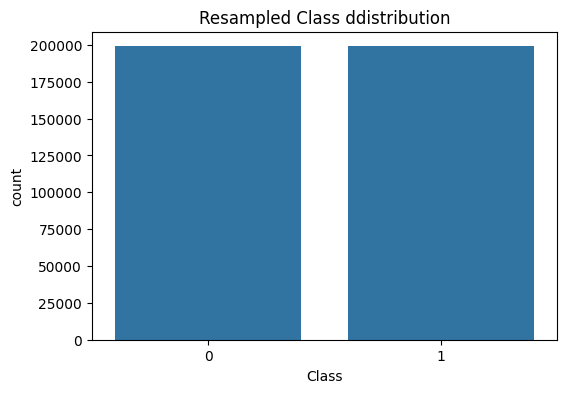

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_res)
plt.title('Resampled Class ddistribution')
plt.show()


In [25]:
scaler=StandardScaler()

In [26]:
x_train_res=scaler.fit_transform(x_train_res)
x_test=scaler.transform(x_test)

In [27]:
dt=DecisionTreeClassifier()
dt.fit(x_train_res,y_train_res)

DecisionTreeClassifier()

In [28]:
y_pred=dt.predict(x_test)

In [29]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:


print("Decision Tree Performance:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, dt.predict_proba(x_test)[:, 1])}")

Decision Tree Performance:
[[85153   155]
 [   36    99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.39      0.73      0.51       135

    accuracy                           1.00     85443
   macro avg       0.69      0.87      0.75     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8657581938387959


In [35]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.01)  
model.fit(x)

IsolationForest(contamination=0.01)

In [38]:
predictions = model.predict(x)
df['Anomaly'] = predictions


In [40]:
df[df['Anomaly']==-1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Anomaly
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0,-1
362,266.0,-2.564961,2.470985,2.649417,-1.564256,1.794297,-0.614742,4.185906,-3.855359,5.436633,...,-0.463149,-0.532466,0.306494,0.226844,-0.365416,-0.936735,-2.733887,10.35,0,-1
401,290.0,-5.166299,-5.449369,2.988498,2.658991,1.948152,-0.854470,-0.326394,-1.017364,1.983901,...,1.172278,3.150413,0.574081,1.018394,0.987099,0.658283,-1.609716,85.00,0,-1
601,454.0,-3.133891,2.887394,2.178690,-1.576535,1.434510,-0.687313,3.816056,-3.416915,5.459274,...,-0.498518,-0.476668,0.302196,0.299993,-0.359155,-0.958818,-2.735623,9.65,0,-1
1047,792.0,-2.496329,1.157444,3.770236,-0.230246,0.007065,0.506341,1.629152,-2.267294,4.304904,...,0.105965,-0.558559,0.732507,0.069949,-0.030734,-2.887661,-1.683655,3.37,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284393,172401.0,-4.571996,4.001637,-0.686328,-2.340542,1.680291,-0.634889,3.478058,-2.874886,6.437965,...,1.511540,-0.372606,-0.430795,-0.079541,-0.715266,-1.310732,-3.320889,0.89,0,-1
284448,172454.0,-5.128786,4.434560,-1.152573,-2.357638,1.316643,-0.703130,3.111958,-2.436404,6.459490,...,1.479393,-0.302331,-0.435989,-0.003085,-0.708154,-1.330861,-3.323162,1.79,0,-1
284649,172642.0,-11.946976,9.772660,-8.006237,-2.498596,-4.229520,-1.320039,-3.259766,5.059956,4.870093,...,-1.529035,0.838689,-1.249172,1.714495,0.314623,2.112848,1.234408,10.74,0,-1
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0,-1


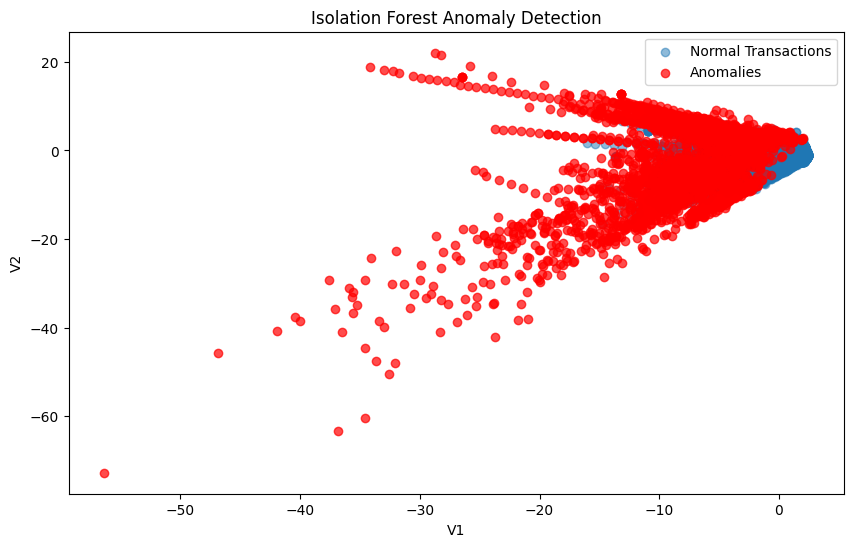

In [45]:
import matplotlib.pyplot as plt

# visulize  feature only v1 and v2 ...
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Anomaly'] == 1]['V1'], df[df['Anomaly'] == 1]['V2'], 
            label='Normal Transactions', alpha=0.5)
plt.scatter(df[df['Anomaly'] == -1]['V1'], df[df['Anomaly'] == -1]['V2'], 
            label='Anomalies', color='red', alpha=0.7)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.show()
